### Importación de datos



In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [31]:
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

print(f"Ingreso Tienda 1: ${ingreso_tienda1:,.2f}")
print(f"Ingreso Tienda 2: ${ingreso_tienda2:,.2f}")
print(f"Ingreso Tienda 3: ${ingreso_tienda3:,.2f}")
print(f"Ingreso Tienda 4: ${ingreso_tienda4:,.2f}")

Ingreso Tienda 1: $1,150,880,400.00
Ingreso Tienda 2: $1,116,343,500.00
Ingreso Tienda 3: $1,098,019,600.00
Ingreso Tienda 4: $1,038,375,700.00


In [29]:
tienda['origen'] = 'Tienda 1'
tienda2['origen'] = 'Tienda 2'
tienda3['origen'] = 'Tienda 3'
tienda4['origen'] = 'Tienda 4'

todas_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])

# Calcular ingresos agrupados por tienda
ingresos_totales = todas_tiendas.groupby('origen')['Precio'].sum().reset_index()
ingresos_totales.columns = ['Tienda', 'Ingreso Total']
print(ingresos_totales)

     Tienda  Ingreso Total
0  Tienda 1   1.150880e+09
1  Tienda 2   1.116344e+09
2  Tienda 3   1.098020e+09
3  Tienda 4   1.038376e+09


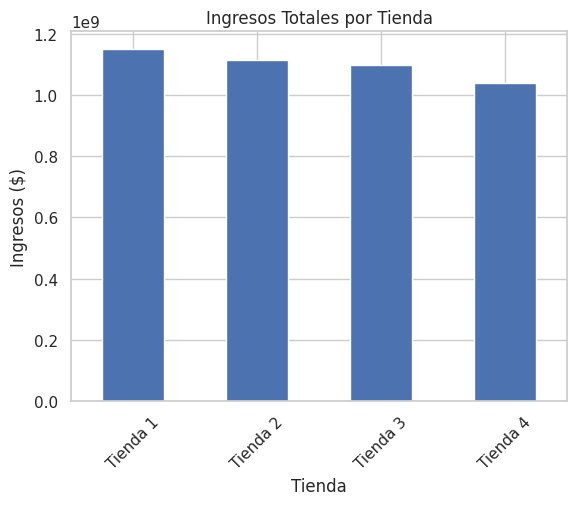

In [30]:
import matplotlib.pyplot as plt

ingresos_totales.plot(kind='bar', x='Tienda', y='Ingreso Total', legend=False)
plt.title("Ingresos Totales por Tienda")
plt.ylabel("Ingresos ($)")
plt.xticks(rotation=45)
plt.show()


# 2. Ventas por categoría

In [18]:
resultados = {}

for i, df_tienda in enumerate([tienda, tienda2, tienda3, tienda4], start=1):
    ventas_por_categoria = df_tienda.groupby('Categoría del Producto').size().reset_index(name='Ventas')
    resultados[f'Tienda_{i}'] = ventas_por_categoria

# Mostrar resultados para cada tienda
for tienda_nombre, df_resultado in resultados.items():
    print(f"\n{tienda_nombre}:")
    print(df_resultado.sort_values('Ventas', ascending=False))


Tienda_1:
    Categoría del Producto  Ventas
7                  Muebles     465
3             Electrónicos     448
5                 Juguetes     324
2        Electrodomésticos     312
1     Deportes y diversión     284
4   Instrumentos musicales     182
6                   Libros     173
0  Artículos para el hogar     171

Tienda_2:
    Categoría del Producto  Ventas
7                  Muebles     442
3             Electrónicos     422
5                 Juguetes     313
2        Electrodomésticos     305
1     Deportes y diversión     275
4   Instrumentos musicales     224
6                   Libros     197
0  Artículos para el hogar     181

Tienda_3:
    Categoría del Producto  Ventas
7                  Muebles     499
3             Electrónicos     451
5                 Juguetes     315
2        Electrodomésticos     278
1     Deportes y diversión     277
6                   Libros     185
0  Artículos para el hogar     177
4   Instrumentos musicales     177

Tienda_4:
    Categor

# 3. Calificación promedio de la tienda


In [5]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

for nombre, df in tiendas.items():
    promedio = df['Calificación'].mean()
    print(f"{nombre}: {promedio:.2f}")

Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [6]:
ventas_tienda1 = tienda['Producto'].value_counts().reset_index()
ventas_tienda1.columns = ['Producto', 'Ventas']  # Renombrar columnas
ventas_tienda1 = ventas_tienda1.sort_values('Ventas', ascending=False)

ventas_tienda2 = tienda['Producto'].value_counts().reset_index()
ventas_tienda2.columns = ['Producto', 'Ventas']  # Renombrar columnas
ventas_tienda2 = ventas_tienda2.sort_values('Ventas', ascending=False)

ventas_tienda3 = tienda['Producto'].value_counts().reset_index()
ventas_tienda3.columns = ['Producto', 'Ventas']  # Renombrar columnas
ventas_tienda3 = ventas_tienda3.sort_values('Ventas', ascending=False)

ventas_tienda4 = tienda['Producto'].value_counts().reset_index()
ventas_tienda4.columns = ['Producto', 'Ventas']  # Renombrar columnas
ventas_tienda4 = ventas_tienda4.sort_values('Ventas', ascending=False)

In [7]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

resultados = {}
for nombre, df in tiendas.items():
    conteo = df['Producto'].value_counts().reset_index()
    conteo.columns = ['Producto', 'Ventas']
    resultados[nombre] = conteo.sort_values('Ventas', ascending=False)

In [12]:
for nombre, df in resultados.items():
    print(f"\n{nombre} - Top 5 productos:")
    print(df.head(5))
    print(f"\n{nombre} - Menos vendidos:")
    print(df.tail(5))


Tienda 1 - Top 5 productos:
           Producto  Ventas
0        Microondas      60
1     TV LED UHD 4K      60
2           Armario      60
3  Secadora de ropa      58
4     Mesa de noche      56

Tienda 1 - Menos vendidos:
                       Producto  Ventas
46  Ciencia de datos con Python      39
47                    Pandereta      36
48              Olla de presión      35
49    Auriculares con micrófono      33
50                 Celular ABXY      33

Tienda 2 - Top 5 productos:
                    Producto  Ventas
0  Iniciando en programación      65
1                 Microondas      62
2                    Batería      61
3          Guitarra acústica      58
4                  Pandereta      58

Tienda 2 - Menos vendidos:
           Producto  Ventas
46      Auriculares      37
47           Sillón      35
48  Mesa de comedor      34
49        Impresora      34
50    Juego de mesa      32

Tienda 3 - Top 5 productos:
          Producto  Ventas
0    Kit de bancas      57
1  Me

<ipython-input-13-f69937843b28>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.head(5), x='Ventas', y='Producto', palette="viridis")
<ipython-input-13-f69937843b28>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.head(5), x='Ventas', y='Producto', palette="viridis")
<ipython-input-13-f69937843b28>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.head(5), x='Ventas', y='Producto', palette="viridis")
<ipython-input-13-f69937843b28>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wi

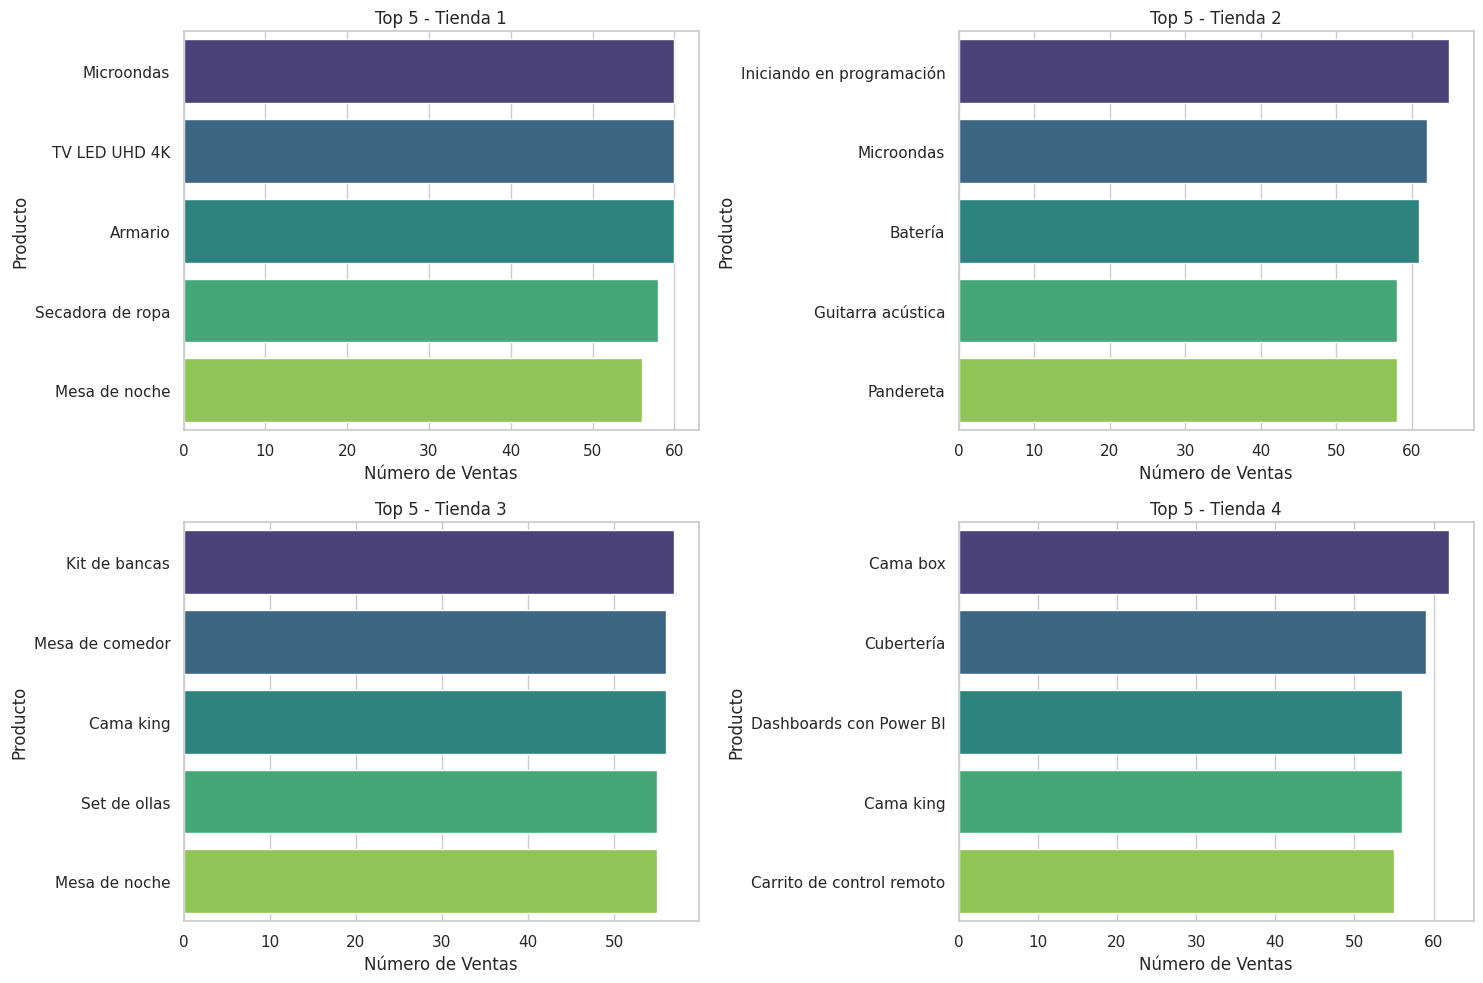

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 10))

for i, (nombre, df) in enumerate(resultados.items(), 1):
    plt.subplot(2, 2, i)
    sns.barplot(data=df.head(5), x='Ventas', y='Producto', palette="viridis")
    plt.title(f'Top 5 - {nombre}')
    plt.xlabel('Número de Ventas')

plt.tight_layout()
plt.show()

<ipython-input-15-4b4dafdc17f0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.tail(5), x='Ventas', y='Producto', palette="magma")
<ipython-input-15-4b4dafdc17f0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.tail(5), x='Ventas', y='Producto', palette="magma")
<ipython-input-15-4b4dafdc17f0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.tail(5), x='Ventas', y='Producto', palette="magma")
<ipython-input-15-4b4dafdc17f0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

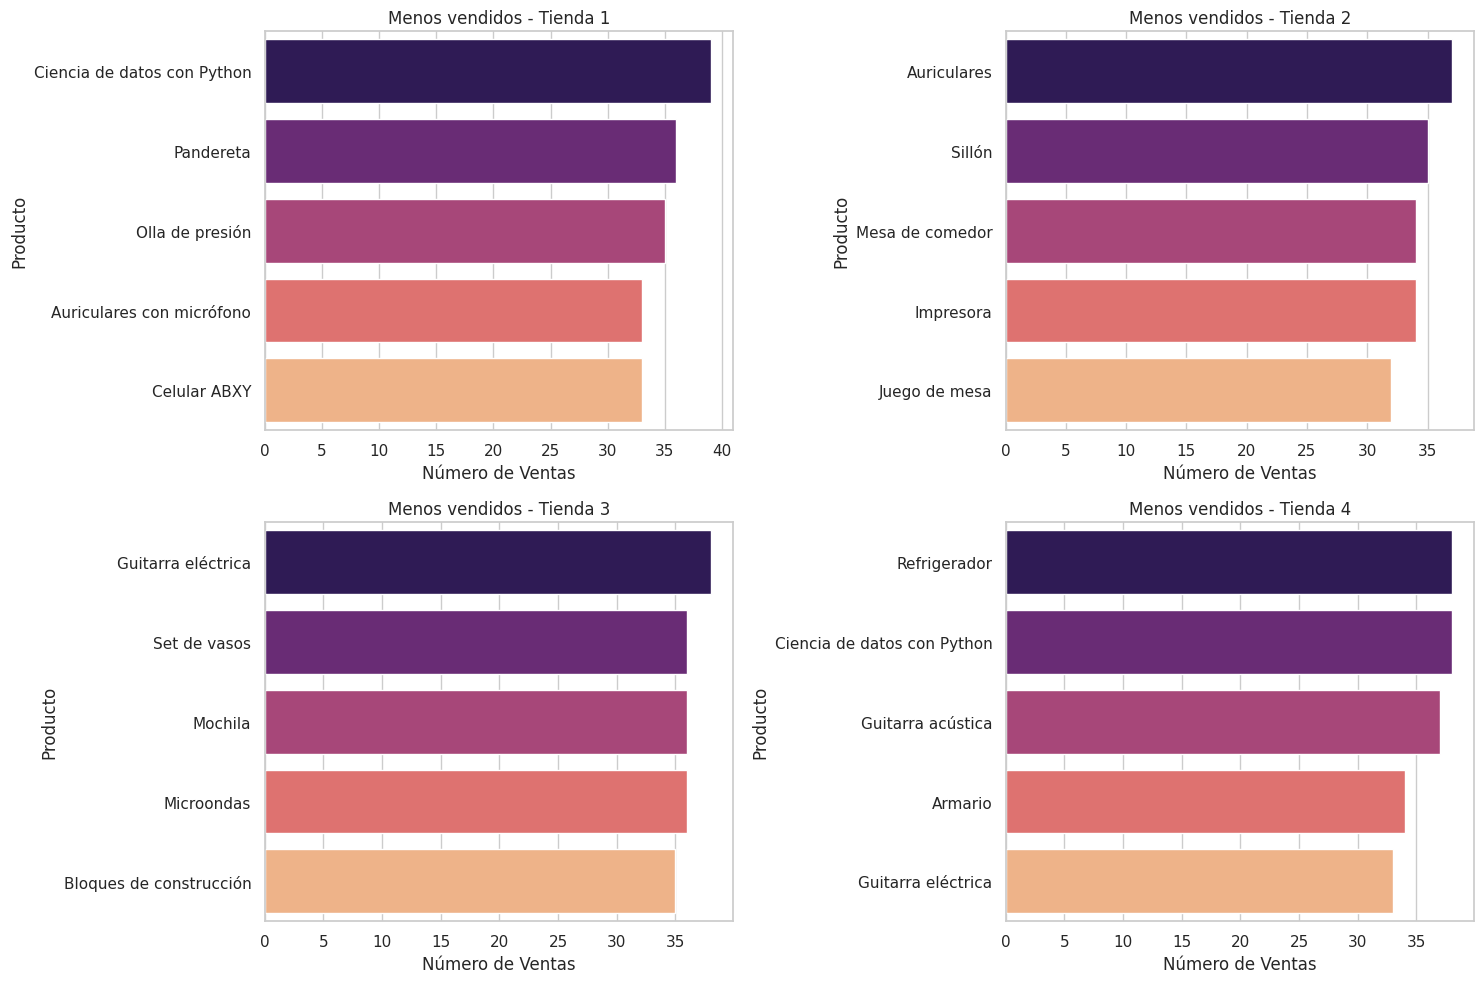

In [15]:
plt.figure(figsize=(15, 10))
for i, (nombre, df) in enumerate(resultados.items(), 1):
    plt.subplot(2, 2, i)
    sns.barplot(data=df.tail(5), x='Ventas', y='Producto', palette="magma")
    plt.title(f'Menos vendidos - {nombre}')
    plt.xlabel('Número de Ventas')

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [17]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

for nombre, df in tiendas.items():
    promedio = df['Costo de envío'].mean()
    print(f"{nombre}: ${promedio:.2f} (promedio de envío)")

Tienda 1: $26018.61 (promedio de envío)
Tienda 2: $25216.24 (promedio de envío)
Tienda 3: $24805.68 (promedio de envío)
Tienda 4: $23459.46 (promedio de envío)


# 6. Analisis final.


El Señor Juan, quien es propietario de las tiendas Alura Store, desea expadir su portafolio económico y de servicios incursionando en un nuevo emprendimiento y nicho de mercaso. Sin embargo es necesario desistir de unas de sus sucursales, vendiéndola, para así tener el capital necesario e iniciar con su nuevo negocio.

Con el fin de analizar cada una de las sucursales de Alura Store, se proveyó una base de datos por tienda, las cuales contienen la cantidad de ventas, articulos vendidos, costo de envío y puntuación. Esta información es revelante pues se analizará con el fin de saber cual de estos lugares es el menos rentable para el Sr. Juan y su venta garantizaría el capital de inversión necesario sin afectar su empresa actual.

### Analisis de facturación:

Al sumar las compras efectivas de cada una de las tiendas se encontró que la tienda1 fue la que mayor facturación tuvo, minentras que la tienda4 fue la que menos ingresos registro en comparación.

### Calificación de la tienda:

Aunque la tienda1 tuvo mayores ventas es la que menor puntaje tiene entre sus clientes, en cambio la tienda2 y tienda3 son las que mayor puntaje reunen con 4.04 y 4.05 respectivamente.

### Resultados:

La decsision final se toma con base en estos dos rubros (facturación y calificación) pues son los dos directamente relacionados con los clientes. Aunque la tienda1 no obtuvo la mejor puntuacion si es la que mayores ingresos trae a la compañía. La tienda3 y tienda2 son las más populares en el público y sus ingresos no están tan lejanos al primer puesto (tienda1). En cuanto a la tienda4 presenta los ingresos más bajos y se encuentra en la tercera posicion dentro de la puntuación de los clientes, superando unicamente a la tienda1. A pesar de que su envío es el más ecónomico considero que no es motivo suficiente para para mantener la sucursalr abierta.

En conclusion la tienda4 sería la elegida para su venta con el objetivo de tener el capital de inversión para un nuevo emprendimiento.




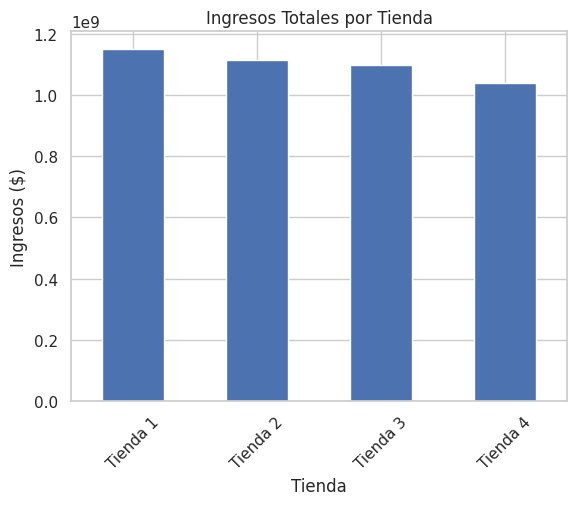

In [32]:
ingresos_totales.plot(kind='bar', x='Tienda', y='Ingreso Total', legend=False)
plt.title("Ingresos Totales por Tienda")
plt.ylabel("Ingresos ($)")
plt.xticks(rotation=45)
plt.show()